In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

In [34]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [35]:
churn_df = churn_df[["tenure","age","address","income","ed","employ" ,"equip" , "churn","callcard"]]
churn_df['churn'] = churn_df['churn'].astype('int')

In [36]:
x = np.asarray(churn_df[['tenure','age','address','income','ed','employ','equip',"callcard"]])
y = np.asarray(churn_df['churn'])


In [37]:
x_norm = StandardScaler().fit(x).transform(x)
x_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916]])

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x_norm , y , test_size = 0.2 , random_state = 4)

In [39]:
LR = LogisticRegression().fit(x_train , y_train)
yhat = LR.predict(x_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [40]:
yhat_prob = LR.predict_proba(x_test)
yhat_prob[:10]

array([[0.77047565, 0.22952435],
       [0.93543984, 0.06456016],
       [0.75062776, 0.24937224],
       [0.94883131, 0.05116869],
       [0.77117014, 0.22882986],
       [0.80793559, 0.19206441],
       [0.67970438, 0.32029562],
       [0.91850805, 0.08149195],
       [0.20574314, 0.79425686],
       [0.95243863, 0.04756137]])

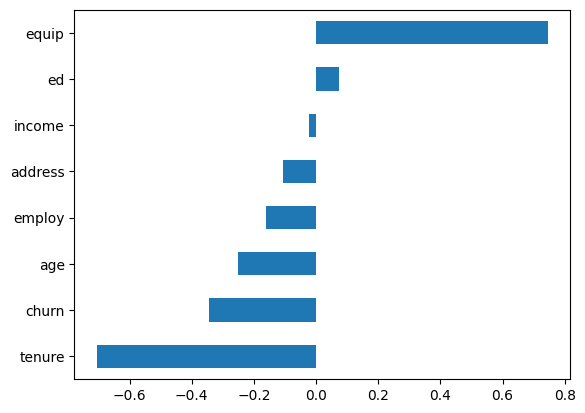

In [41]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind="barh")
plt.show()


In [42]:
log_loss(y_test , yhat_prob)

0.6039104035600186